# ZS Data Science Challenge - 2019

## PROBLEM STATEMENT

### As we all know, Cristiano Ronaldo is a legend in the football world. He has played a thousand games and scored hundreds of goals. Now, given the number of Cristiano Ronald , "attempts" on the goal target of his recorded and unrecorded matches, predict if he has scored a goal or not Formally, you are given a dataset of attempts taken by Ronaldo, predict if he soared a goal or not.


## DATA FORMAT

### This dataset contains the records of all the attempts Ronald has taken. 
### The column "is_goal" has a missing value for all the rows you need to predict the value of "is_goal". 
### Extract the rows with missing "is_goal" value and submit your prediction as the probability [0.0 -1.0] of the goal soared.


## EVALUATION

### The ranking would be done based on the following formula, score = 1 / (1 + MAE)
### MAE	Mean Absolute Error

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import math 
import sklearn
import matplotlib.dates as mdates

pd.options.mode.chained_assignment = None
%matplotlib inline

# Importing data

In [11]:
data = pd.read_csv('data.csv')

In [12]:
data

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.00,50.608,54.2000,38.000
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.00,28.800,22.0000,35.000
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.00,0.000,63.7216,54.400
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.00,122.608,52.0000,42.000
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.00,0.000,19.0000,20.000
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.00,0.000,NaN,34.000
6,6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.00,0.000,112.2000,89.400
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.00,0.000,5.0000,22.000
8,8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.00,0.000,12.0000,32.000
9,9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.00,0.000,52.2000,NaN


# Exploratory Data Analysis 

In [13]:
train_data=data[~data['is_goal'].isnull()]

In [14]:
train_data.shape

(24429, 28)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 1 to 30696
Data columns (total 28 columns):
Unnamed: 0               24429 non-null int64
match_event_id           23189 non-null float64
location_x               23273 non-null float64
location_y               23184 non-null float64
remaining_min            23185 non-null float64
power_of_shot            23229 non-null float64
knockout_match           23217 non-null float64
game_season              19797 non-null object
remaining_sec            23179 non-null float64
distance_of_shot         23172 non-null float64
is_goal                  24429 non-null float64
area_of_shot             23247 non-null object
shot_basics              23146 non-null object
range_of_shot            23181 non-null object
team_name                23217 non-null object
date_of_game             23192 non-null object
home/away                23215 non-null object
shot_id_number           23179 non-null float64
lat/lng                  23182 non-n

In [16]:
train_data.nunique()

Unnamed: 0               24429
match_event_id             614
location_x                 485
location_y                 433
remaining_min               12
power_of_shot                7
knockout_match               2
game_season                 20
remaining_sec               60
distance_of_shot            73
is_goal                      2
area_of_shot                 6
shot_basics                  7
range_of_shot                5
team_name                    1
date_of_game              1557
home/away                   74
shot_id_number           23179
lat/lng                     38
type_of_shot                57
type_of_combined_shot        6
match_id                  1558
team_id                      1
remaining_min.1            287
power_of_shot.1            203
knockout_match.1           378
remaining_sec.1            350
distance_of_shot.1         269
dtype: int64

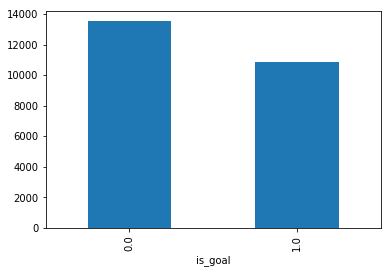

In [17]:
train_data.groupby('is_goal').size().plot(kind = 'bar')

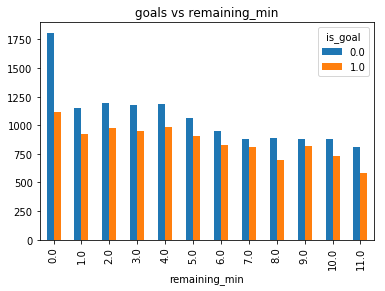

In [18]:
train_data.groupby(['remaining_min', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs remaining_min")

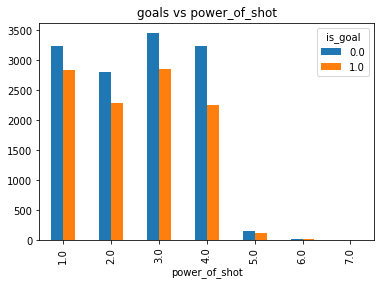

In [19]:
train_data.groupby(['power_of_shot', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs power_of_shot")

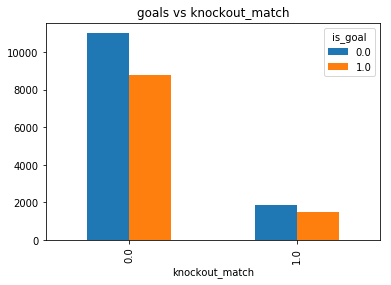

In [20]:
train_data.groupby(['knockout_match', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs knockout_match")

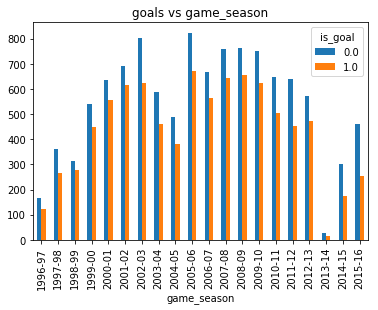

In [21]:
train_data.groupby(['game_season', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs game_season")

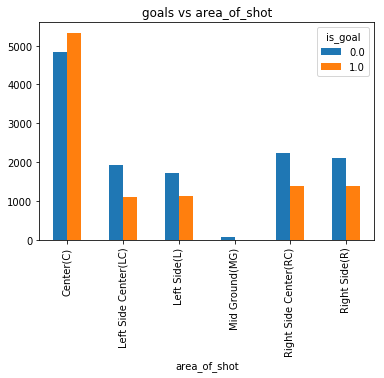

In [22]:
train_data.groupby(['area_of_shot', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs area_of_shot")

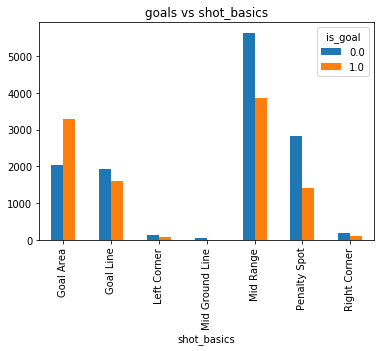

In [23]:
train_data.groupby(['shot_basics', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs shot_basics")

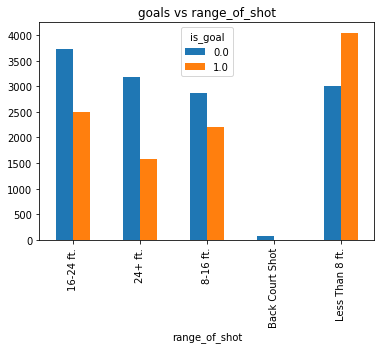

In [24]:
train_data.groupby(['range_of_shot', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs range_of_shot")

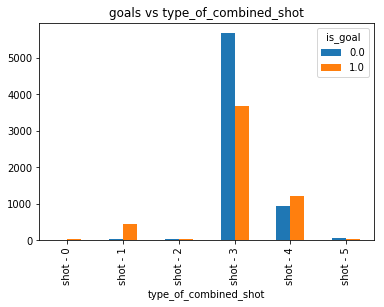

In [25]:
train_data.groupby(['type_of_combined_shot', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs type_of_combined_shot")

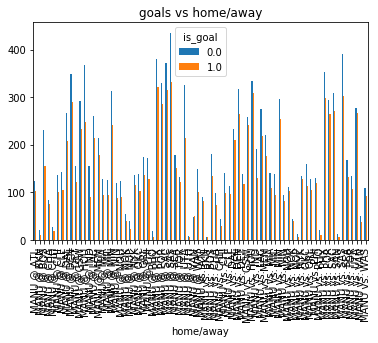

In [26]:
train_data.groupby(['home/away', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs home/away")

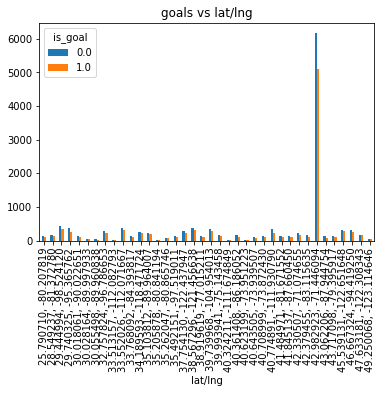

In [27]:
train_data.groupby(['lat/lng', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs lat/lng")

# Data Pre-Processing & Feature Engineering

In [28]:
data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [29]:
data.shape

(30697, 28)

In [30]:
del data['Unnamed: 0']

In [31]:
data.isnull().sum()

match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [32]:
data.nunique()

match_event_id             618
location_x                 488
location_y                 450
remaining_min               12
power_of_shot                7
knockout_match               2
game_season                 20
remaining_sec               60
distance_of_shot            73
is_goal                      2
area_of_shot                 6
shot_basics                  7
range_of_shot                5
team_name                    1
date_of_game              1558
home/away                   74
shot_id_number           29134
lat/lng                     38
type_of_shot                57
type_of_combined_shot        6
match_id                  1559
team_id                      1
remaining_min.1            291
power_of_shot.1            206
knockout_match.1           382
remaining_sec.1            354
distance_of_shot.1         271
dtype: int64

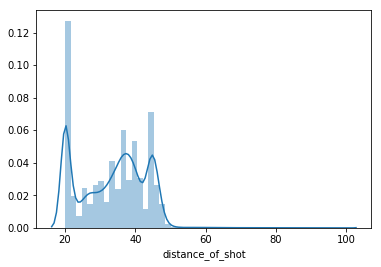

In [33]:
import seaborn as sns
sns.distplot(data['distance_of_shot'].dropna())

In [34]:
crosstable=pd.crosstab(data['game_season'] , data.is_goal)
crosstable['percent']=crosstable.iloc[:,0]/(crosstable.iloc[:,0]+crosstable.iloc[:,1])
crosstable = crosstable.sort_values(['percent'], ascending=[False])
crosstable

is_goal,0.0,1.0,percent
game_season,,,
2015-16,459,255,0.642857
2014-15,301,173,0.635021
2013-14,28,17,0.622222
2011-12,640,453,0.585544
1996-97,168,123,0.577320
1997-98,361,266,0.575758
2002-03,804,625,0.562631
2010-11,647,506,0.561145
2003-04,587,460,0.560649


In [35]:
crosstable=pd.crosstab(data['lat/lng'] , data.is_goal)
crosstable['percent']=crosstable.iloc[:,0]/(crosstable.iloc[:,0]+crosstable.iloc[:,1])
crosstable = crosstable.sort_values(['percent'], ascending=[False])
crosstable

is_goal,0.0,1.0,percent
lat/lng,,,
"33.513157, -112.082793",18,8,0.692308
"35.205878, -80.841194",31,17,0.645833
"40.623199, -73.951223",20,11,0.645161
"30.055498, -89.960838",40,23,0.634921
"40.361408, -86.186052",151,98,0.606426
"40.774891, -111.930790",334,217,0.606171
"38.919619, -77.015211",147,98,0.600000
"29.740325, -95.365762",360,246,0.594059
"42.330507, -71.074655",234,160,0.593909


In [36]:
crosstable=pd.crosstab(data['type_of_combined_shot'] , data.is_goal)
crosstable['percent']=crosstable.iloc[:,0]/(crosstable.iloc[:,0]+crosstable.iloc[:,1])
crosstable = crosstable.sort_values(['percent'], ascending=[False])
crosstable

is_goal,0.0,1.0,percent
type_of_combined_shot,,,
shot - 5,47,25,0.652778
shot - 3,5674,3664,0.607625
shot - 2,29,37,0.439394
shot - 4,923,1206,0.433537
shot - 0,16,45,0.262295
shot - 1,34,436,0.072340


In [37]:
data['location_x'].fillna(0.0, inplace=True)
data['location_y'].fillna(0.0, inplace=True)
data['location'] = data['location_x']**2 + data['location_y']**2
data['location'] = data['location']**(1/2)



### the mode value of locations were both 0.

In [38]:
data['remaining_min'][data['remaining_min'].isna()] = data['remaining_min.1']
del data['remaining_min.1']
data['remaining_min'].values[data['remaining_min'].values > 11.0000] = 'NaN'
data['remaining_min'].fillna(data['remaining_min'].median(), inplace=True)

/home/krishna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


### There was a duplicate column for remaining_min which had missing values of the first columns but also
### had few absurd values so missing values were copied and absurd values were replaced by median.

In [39]:
data['power_of_shot'][data['power_of_shot'].isna()] = data['power_of_shot.1']
del data['power_of_shot.1']
data['power_of_shot'].values[data['power_of_shot'].values > 7.00] = 'NaN'
data['power_of_shot'].fillna(method='ffill', inplace=True)

/home/krishna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


### There was a duplicate column for power_of_shot which had missing values of the first columns but also
### had few absurd values so missing values were copied and absurd values were replaced by median.

In [40]:
data['knockout_match'][data['knockout_match'].isna()] = data['knockout_match.1']
del data['knockout_match.1']
data['knockout_match'].values[data['knockout_match'].values > 1.00000] = 'NaN' 
data['knockout_match'].fillna(method='ffill', inplace=True)

/home/krishna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


### There was a duplicate column for knockout_match which had missing values of the first columns but also
### had few absurd values so missing values were copied and absurd values were replaced by median.

In [41]:
data['area_of_shot'][data['shot_basics']=='Goal Area'] = 'Center(C)'
data['area_of_shot'][data['shot_basics']=='Right Corner'] = 'Right Side(R)'
data['area_of_shot'][data['shot_basics']=='Left Corner'] = 'Left Side(L)'
data['area_of_shot'][data['shot_basics']=='Mid Ground Line'] = 'Mid Ground(MG)'
data['area_of_shot'][data['range_of_shot']=='Less Than 8 ft.'] = 'Center(C)'
data['area_of_shot'][data['location_x']>50] = 'Right Side(R)'
data['area_of_shot'][data['location_x']<-50] = 'Left Side(L)'
data['area_of_shot'][data['type_of_combined_shot']=='shot - 4'] = 'Center(C)'
data['area_of_shot'][data['distance_of_shot']<28] = 'Center(C)'

In [42]:
data['shot_basics'][data['range_of_shot']=='16-24 ft.'] = 'Mid Range'
data['shot_basics'][data['type_of_combined_shot']=='shot - 1'] = 'Goal Area'
data['shot_basics'][data['type_of_combined_shot']=='shot - 5'] = 'Goal Area'

In [43]:
data['range_of_shot'][data['shot_basics']=='Goal Area'] = 'Less Than 8 ft.'
data['range_of_shot'][data['shot_basics']=='Penalty Spot'] = '24+ ft.'
data['range_of_shot'][data['shot_basics']=='Mid Ground Line'] = 'Back Court Shot'
data['range_of_shot'][data['distance_of_shot']<29] = 'Less Than 8 ft.'
data['range_of_shot'][data['type_of_shot']=='shot - 1'] = 'Less Than 8 ft.'

### These 3 variables could be filled 90% with the help of each other as they were all dependent on each other upon looking carefully and analysing. and rest few values were replaced by median values or preceeding values depending on observations later in the code.

In [44]:
data['game_season'].fillna(method='ffill', inplace=True)
data['date_of_game'].fillna(method='ffill', inplace=True)

### Upon looking carefully I could observe a pattern in the dataset as game_season and date_of_game were arranged on ascending order which meant we could use forward or backward fill, the choice among which was also based on further interpretation.

In [45]:
data['remaining_sec'][data['remaining_sec'].isna()] = data['remaining_sec.1']
del data['remaining_sec.1']
data['remaining_sec'].values[data['remaining_sec'].values > 59.0000] = "NaN"
data['remaining_sec'].fillna(data['remaining_sec'].median(), inplace=True)

/home/krishna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


### There was a duplicate column for remaining_sec which had missing values of the first columns but also
### had few absurd values so missing values were copied and absurd values were replaced by median.

In [46]:
data['distance_of_shot'][data['distance_of_shot'].isna()] = data['distance_of_shot.1']
del data['distance_of_shot.1']
data['distance_of_shot'].values[data['distance_of_shot'].values > 99.000] = "NaN"
data['distance_of_shot'].fillna(data['distance_of_shot'].median(), inplace=True)

/home/krishna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


### There was a duplicate column for distance_of_shot which had missing values of the first columns but also
### had few absurd values so missing values were copied and absurd values were replaced by median.

In [47]:
data['lat/lng'].fillna(method='bfill', inplace=True)
data['home/away'].fillna(method='ffill', inplace=True)

### Upon looking carefully I could observe a pattern in the dataset as lat/lng and home/away were arranged on preceding order which meant we could use forward or backward fill, the choice among which was also based on further interpretation.

In [48]:
data['type_of_shot'].fillna(data['type_of_combined_shot'], inplace=True)
data['Assisted']=data['type_of_shot']
data['Assisted'][data['type_of_shot'].isin(['shot - 3','shot - 4','shot - 1','shot - 5','shot - 2','shot - 0',])]=1
data['Assisted'][~data['type_of_shot'].isin(['shot - 3','shot - 4','shot - 1','shot - 5','shot - 2','shot - 0',])]=0

### These two column: type_of_shot and type_of_combined_shot seemed to be independent shot and assisted shot by ronaldo so I made another column named assisted and assigned it 0 and 1 based on two columns.

In [49]:
data['shot_id_number'] = data.index + 1
del data['team_name']
del data['team_id']
del data['match_event_id']

### The values in shot_id_number was also missing, it was a simple serial number so made manipulations accordingly because it was needed for submission csv file.

In [50]:
# data = pd.get_dummies(data, columns=['game_season'])
# data=data.drop(['game_season_2013-14'],axis=1) #dummy variable trap

### Game season was one hot encoded and label encoded both and accuracy was compared. dummy variable creation was leading to many number of attributes so it was label encoded as this basically is a time span so it can be label encoded.

In [51]:
data['area_of_shot'].fillna(method='ffill', inplace=True)
data['shot_basics'].fillna(method='ffill', inplace=True)
data['range_of_shot'].fillna(method='ffill', inplace=True)

### As discussed above they were treated before and the rest of them were filled based on observation.

In [52]:
data['home']=data['type_of_shot']
data['home'][data['home/away'].str.contains('@')] = 1
data['home'][~data['home/away'].str.contains('@')] = 0

### home/away column had @ and vs with same team which mean 1 of them was a home game and the other away so I created a home column which had 0 and 1 values repectively.

In [53]:
data['home/away'] = data['home/away'].str.replace('MANU', '')
data['home/away'] = data['home/away'].str.replace('@', '')
data['home/away'] = data['home/away'].str.replace('vs.', '')
data['home/away'] = data['home/away'].str.strip()
data['opponent']=data['home/away']
data['home/away']

0        POR
1        POR
2        POR
3        POR
4        POR
5        POR
6        POR
7        POR
8        POR
9        POR
10       POR
11       UTA
12       UTA
13       UTA
14       UTA
15       UTA
16       UTA
17       UTA
18       UTA
19       UTA
20       UTA
21       UTA
22       UTA
23       UTA
24       UTA
25       UTA
26       UTA
27       UTA
28       UTA
29       UTA
        ... 
30667    IND
30668    IND
30669    IND
30670    IND
30671    IND
30672    IND
30673    IND
30674    IND
30675    IND
30676    IND
30677    IND
30678    IND
30679    IND
30680    IND
30681    IND
30682    IND
30683    IND
30684    IND
30685    IND
30686    IND
30687    IND
30688    IND
30689    IND
30690    IND
30691    IND
30692    IND
30693    IND
30694    IND
30695    IND
30696    IND
Name: home/away, Length: 30697, dtype: object

### Now home and away was taken care by the home column so I created another column called opponent from the home/away column so basically that column was broken into two columns with different meanings.

In [54]:
data['date_of_game'] = pd.to_datetime(data.date_of_game,format='%Y-%m-%d')
data['year']=data['date_of_game'].dt.year
data['month']=data['date_of_game'].dt.month
data['day']=data['date_of_game'].dt.day
data['dayofweek']=data['date_of_game'].dt.dayofweek
del data['date_of_game']

### Now date_of_game was broken into year, month, day and dayofweek as it might be that he plays better in certain months or may be certain months had home games where the winning probability would be more and so on so these values would be useful.

In [55]:
# data = pd.get_dummies(data, columns=['area_of_shot'])
# data=data.drop(['area_of_shot_Mid Ground(MG)'],axis=1) #dummy variable trap
# data = pd.get_dummies(data, columns=['shot_basics'])
# data=data.drop(['shot_basics_Left Corner'],axis=1) #dummy variable trap
# data = pd.get_dummies(data, columns=['range_of_shot'])
# data=data.drop(['range_of_shot_Back Court Shot'],axis=1) #dummy variable trap

### area_of_shot, shot_basics, range_of_shot were initially not onehot encoded as I had to check catboost performance too which required numerical and categorical variables both. But after checking catboost performance they were one hot encoded to implement other bagging and boosting models which require numerical data only.

In [56]:
data=pd.concat([data, data['lat/lng'].str.split(',', expand=True)], axis=1)
data=data.rename(columns={ data.columns[-1]: "longitude" })
data=data.rename(columns={ data.columns[-2]: "latitude" })
data['latitude'] = data['latitude'].astype(np.float)
data['longitude'] = data['longitude'].astype(np.float)
data['lat/lng']

0        45.539131, -122.651648
1        45.539131, -122.651648
2        45.539131, -122.651648
3        45.539131, -122.651648
4        45.539131, -122.651648
5        45.539131, -122.651648
6        45.539131, -122.651648
7        45.539131, -122.651648
8        45.539131, -122.651648
9        45.539131, -122.651648
10       45.539131, -122.651648
11        42.982923, -71.446094
12        42.982923, -71.446094
13        42.982923, -71.446094
14        42.982923, -71.446094
15        42.982923, -71.446094
16        42.982923, -71.446094
17        42.982923, -71.446094
18        42.982923, -71.446094
19        42.982923, -71.446094
20        42.982923, -71.446094
21        42.982923, -71.446094
22        42.982923, -71.446094
23        42.982923, -71.446094
24        42.982923, -71.446094
25        42.982923, -71.446094
26        42.982923, -71.446094
27        42.982923, -71.446094
28        42.982923, -71.446094
29        42.982923, -71.446094
                  ...          
30667   

### lat/lng was converted to different column but were not of that much importance separately so I also kept the original column also.

In [57]:
data.Assisted = data.Assisted.astype(int)

In [58]:
#data.groupby(['year', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs year")

In [59]:
#data.groupby(['month', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs month")

In [60]:
#data.groupby(['day', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs day")

In [61]:
#data.groupby(['dayofweek', 'is_goal']).size().unstack().plot(kind='bar', stacked=False, title="goals vs dayofweek")

In [62]:
# #label encoding of categorical variables
# from sklearn.preprocessing import LabelEncoder
# categorical_variables = data.dtypes.loc[data.dtypes=='object'].index
# le = LabelEncoder()

# for var in categorical_variables:
#     data[var] = data[var].astype(str)
    
# for var in categorical_variables:
#     data[var] = le.fit_transform(data[var])

"""now first we implement catboost then change the categorical variables to numerical to implement other models."""

'now first we implement catboost then change the categorical variables to numerical to implement other models.'

# leaving categorical variables as itself for now to see catboost performance.

# Model Selection

In [63]:
train1=data[~data['is_goal'].isnull()]
train_x=data[~data['is_goal'].isnull()]
train_y=train1['is_goal']
test1=data[data['is_goal'].isnull()]
# test1=test1[~test1['shot_id_number'].isnull()]
test_x=data[data['is_goal'].isnull()]
# test_x=test_x[~test_x['shot_id_number'].isnull()]

del train_x['is_goal']
del train_x['shot_id_number']
del test_x['is_goal']
del test_x['shot_id_number']

# train_y.reset_index()
# train_x.reset_index()

In [64]:
train1

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,...,location,Assisted,home,opponent,year,month,day,dayofweek,latitude,longitude
1,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),...,157.000000,0,1,POR,2000,10,31,1,45.539131,-122.651648
2,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side(L),...,168.600119,0,1,POR,2000,10,31,1,45.539131,-122.651648
3,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side(R),...,222.865430,1,1,POR,2000,10,31,1,45.539131,-122.651648
4,0.0,0.0,5.0,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),...,0.000000,1,1,POR,2000,10,31,1,45.539131,-122.651648
5,-145.0,-11.0,9.0,3.0,0.0,2000-01,32.0,34.0,0.0,Left Side(L),...,145.416643,0,1,POR,2000,10,31,1,45.539131,-122.651648
6,0.0,0.0,8.0,3.0,0.0,2000-01,52.0,20.0,1.0,Center(C),...,0.000000,1,1,POR,2000,10,31,1,45.539131,-122.651648
8,-65.0,0.0,6.0,3.0,0.0,2000-01,12.0,32.0,1.0,Left Side(L),...,65.000000,0,1,POR,2000,10,31,1,45.539131,-122.651648
9,-33.0,0.0,3.0,3.0,0.0,2000-01,36.0,32.0,0.0,Center(C),...,33.000000,0,1,POR,2000,10,31,1,45.539131,-122.651648
10,-94.0,238.0,1.0,3.0,0.0,2000-01,56.0,45.0,0.0,Left Side(L),...,255.890602,0,1,POR,2000,10,31,1,45.539131,-122.651648
11,121.0,127.0,11.0,1.0,0.0,2000-01,0.0,37.0,1.0,Right Side(R),...,175.413796,1,0,UTA,2000,11,1,2,42.982923,-71.446094


In [65]:
train2=data[~data['is_goal'].isnull()]
del train2['is_goal']
del train2['shot_id_number']

In [66]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# train_x = sc_X.fit_transform(train_x)
# test_x = sc_X.transform(test_x)

In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)

In [68]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([ 5,  8,  9, 10, 11, 12, 13, 14, 18, 19])

# Catboost

### Hyperparameter - learning_rate

In [ ]:
import catboost

class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=1994, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values
    
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
        self.model.get_params(), 
        nfold=self.n_fold,
        stratified=self.is_stratified,
        seed=self.seed,
        early_stopping_rounds=self.early_stopping_rounds,
        shuffle=self.is_shuffle,
        verbose=100,
        plot=False)
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
import time

In [ ]:
cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
                         loss_function='Logloss',
                         eval_metric='AUC',
                         boosting_type='Ordered', # use permutations
                         random_seed=1994, 
                         use_best_model=True)
cb_optimizer = CatboostOptimizer(cb, X_train, y_train,categorical_columns_indices=categorical_features_indices)
params_space = [Real(0.01, 0.8, name='learning_rate'),]
cb_optimal_values = cb_optimizer.optimize(params_space)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
m=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',max_depth=6,learning_rate=0.11389587749465084,od_wait=50
                     ,l2_leaf_reg=5,cat_features=categorical_features_indices,bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid, y_valid)], early_stopping_rounds=100,verbose=100)
p2=m.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(p2,y_valid)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
m=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',max_depth=6,learning_rate=0.11389587749465084,od_wait=50
                     ,l2_leaf_reg=10,cat_features=categorical_features_indices,bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid, y_valid)], early_stopping_rounds=100,verbose=100)
p2=m.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(p2,y_valid)

In [ ]:
p3=m.predict_proba(test_x)
sorted(zip(m.feature_importances_,X_train),reverse=True)

In [ ]:
final=pd.DataFrame()
final['shot_id_number'] = test1['shot_id_number']
final['is_goal'] =p3[:,0]
final.to_csv('krishna_priya_181295_prediction_6.csv', index=False)

## Checked catboost once, noted the score by uploading on the leaderboard, then back to feature engineering , made dummy variables and label encodings of categorical data and implemented the below models.

# Random Forest

In [468]:
from sklearn.ensemble import RandomForestClassifier
modelrf=RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=None,
           max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=573869792, verbose=0, warm_start=False)
modelrf.fit(X_train,y_train)
predrf=modelrf.predict(X_valid)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predrf,y_valid)

0.38477282030290627

# AdaBoost

In [290]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
modelada = AdaBoostClassifier(random_state=1,n_estimators=1000,learning_rate=1)
modelada.fit(X_train,y_train)
predada=modelada.predict(X_valid)
predada1=modelada.predict_proba(test_x)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predada,y_valid)

0.3765861645517806

In [291]:
final=pd.DataFrame()
final['shot_id_number'] = test1['shot_id_number']
final['is_goal'] =predada1[:,0]
final.to_csv('krishna_priya_181295_prediction_1.csv', index=False)

# GBOOST

In [398]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier(learning_rate=.15, random_state=1)
modelgb.fit(X_train,y_train)
predgb=modelgb.predict(X_valid)
predgb1=modelgb.predict_proba(test_x)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predgb,y_valid)

0.3643061809250921

In [471]:
final=pd.DataFrame()
final['shot_id_number'] = test1['shot_id_number']
final['is_goal'] =predgb1[:,0]
final.to_csv('krishna_priya_181295_prediction_2.csv', index=False)

# XG Boost

In [365]:
import xgboost
from xgboost import XGBClassifier

modelxgb = XGBClassifier(random_state=1,
                         learning_rate=0.001,
                         n_estimators=350,
                         n_jobs=-1, 
                         eta = 0.1,
                         min_child_weight=9,
                         max_depth = 9,
                         gamma=2,
                         subsample = 0.8,
                         colsample_bytree = 1,
                         colsample_bynode=1,
                         colsample_bylevel=1,
                         reg_lambda= 1,
                         reg_alpha=1,
                         scale_pos_weight=1,
                         num_boost_round = 260,
                         early_stopping_rounds = 260,
                         booster = "gbtree",
                         seed= 0,
                         eval_metric= "mae",
                         objective= "binary:logistic",
                        )
modelxgb.fit(X_train , y_train)
# pred = model.predict_proba(X_valid)
predxgb = modelxgb.predict(X_valid)
predxgb1=modelxgb.predict_proba(test_x)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predxgb,y_valid)

0.36266884977486696

In [366]:
final=pd.DataFrame()
final['shot_id_number'] = test1['shot_id_number']
final['is_goal'] =predxgb1[:,0]
final.to_csv('krishna_priya_181295_prediction_3.csv', index=False)

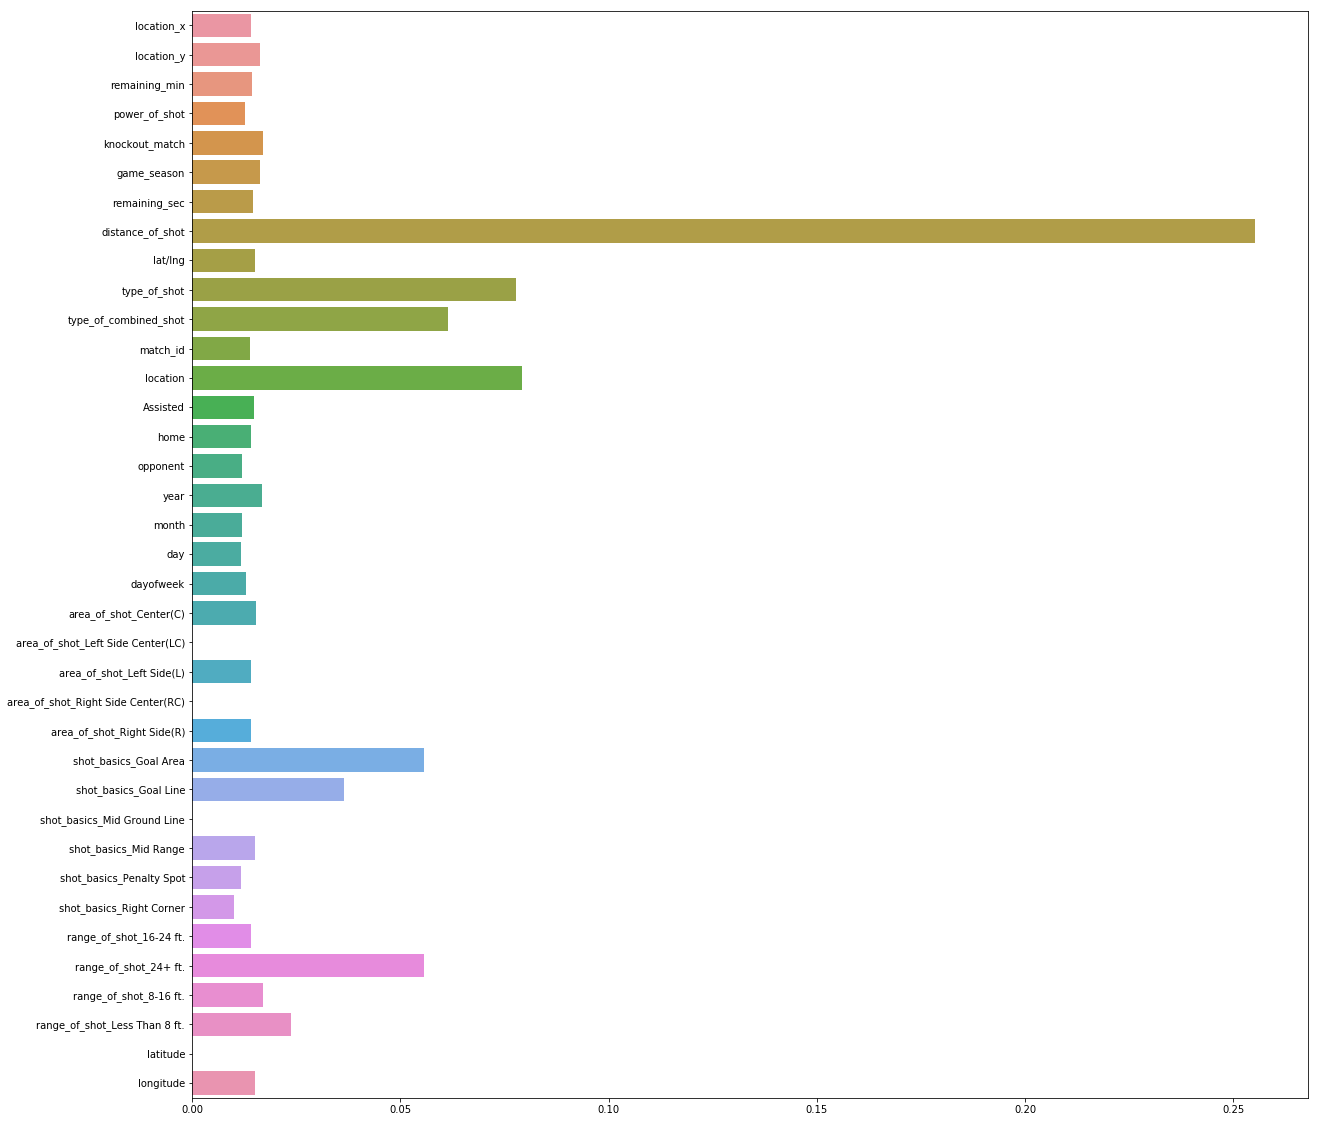

In [367]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.barplot(modelxgb.feature_importances_, train2.columns)

# Ensemble and Stacking Models

In [399]:
from sklearn.ensemble import VotingClassifier
modeleclf = VotingClassifier(estimators=[('ada', modelada), ('gb', modelgb), ('xgb', modelxgb)],voting='soft', weights=[1,1,1])
modeleclf.fit(X_train , y_train)
predeclf = modeleclf.predict(X_valid)
predeclf1=modeleclf.predict_proba(test_x)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predeclf,y_valid)

0.3643061809250921

In [402]:
final=pd.DataFrame()
final['shot_id_number'] = test1['shot_id_number']
final['is_goal'] =predeclf1[:,0]
final.to_csv('krishna_priya_181295_prediction_4.csv', index=False)

# Journey

* **Model Tuning**
* **Curbing the Overfitting**
* **Tried many possible combinations of hyperparameters**
* **Tried other models like Randomforest, gradient boost and LGBM which sadly didnt work**
* **XGBoost ,CatBoost and Adaboost were performing the best. Could increase the score more as the plan was to apply 20 fold cross validation for these two but sadly the time ran out.**

# Highest Score was obtained using Catboost which was 0.957

# Conclusion

* Catboost is best when you have Categorical data as well as numerical, also many hyperparameters to play with. 
* To remove Overfitting, on must check their local score, difference of score in validation set.
* K-Folds cross validation helps curbs overfitting.


## Thanks Inteviewbit and ZS for the Hackathon